In [1]:
#importing useful liberaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import accuracy_score

In [2]:
#Reading the data from CSV file
df = pd.read_csv("health care diabetes_New.csv")

In [3]:
#Used head function to see the overview of the data
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#used columns method to understand the columns available in dataset
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## Column Description

Pregnancies = 'the condition or period of being pregnant.'

Glucose = 'type of sugar in the blood and is the major source of energy for the body's cells.'

BloodPressure = 'the force of blood pushing against the walls of your arteries as your heart pumps blood through your body'

SkinThickness = 'Thick skin is thicker due to it containing an extra layer in the epidermis, called the stratum lucidum'

Insulin = 'a hormone produced in the pancreas by the islets of Langerhans, which regulates the amount of glucose in the blood. The lack of insulin causes a form of diabetes.'

BMI = 'Body mass index (BMI) is a ratio of a person's weight in kilograms to the square of their height in meters.'

DiabetesPedigreeFunction = 'The 'DiabetesPedigreeFunction' is a function that scores the probability of diabetes based on family history, with a realistic range of 0.08 to 2.42'

Age. = 'The length of time that a person has lived'

Outcome = Diabetes, Yes or No

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
#used dtype function to understand the datatypes of the columsn
df.dtypes.to_frame()

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [8]:
#used describe function to see mathematical properties of the dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Exploratory Data Analysis (EDA)

<Axes: ylabel='Frequency'>

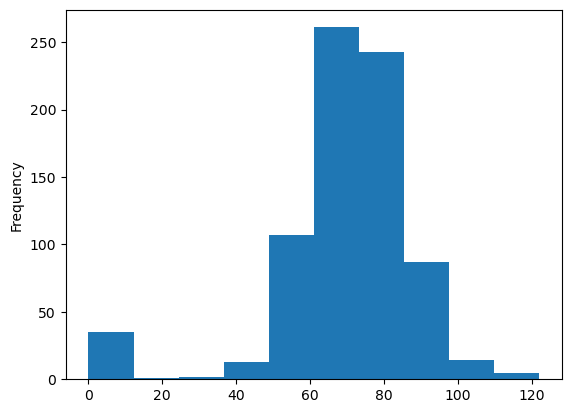

In [9]:
#BloodPressure column analysis
df.BloodPressure.plot(kind='hist')

In [10]:
df.BloodPressure.value_counts(normalize = True).to_frame().head()

,proportion
BloodPressure,
70,0.074219
74,0.067708
78,0.058594
68,0.058594
72,0.057292


<Axes: ylabel='Frequency'>

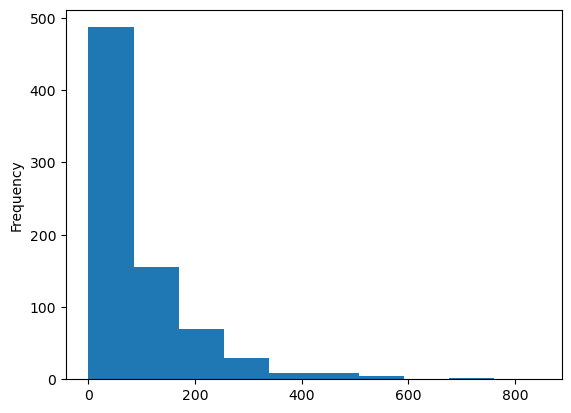

In [11]:
#Insulin column analysis
df.Insulin.plot(kind ='hist')

In [12]:
df.Insulin.value_counts(normalize = True).to_frame().head()


,proportion
Insulin,
0,0.486979
105,0.014323
130,0.011719
140,0.011719
120,0.010417


In [13]:
# Insulin median with 0
df.Insulin.median()

30.5

In [14]:
# Insulin median without 0
Insulin_median = df[df['Insulin'] !=0]['Insulin'].median()
Insulin_median

125.0

### Replaced  all rows with NA or 0 with Median. We also tried Mean but distribution was right skewed so found median more useful approach for our use case.

In [15]:
df['Insulin'] = df['Insulin'].apply(lambda x: Insulin_median if x==0 else x)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,125.0,33.6,0.627,50,1
1,1,85,66,29,125.0,26.6,0.351,31,0
2,8,183,64,0,125.0,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


In [16]:
select_col = ['Glucose','BloodPressure','SkinThickness','BMI' ]

for i in select_col:
    median = df[df[i]!=0][i].median()
    df[i] = df[i].apply(lambda x: median if x==0 else x)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


<Axes: xlabel='Outcome'>

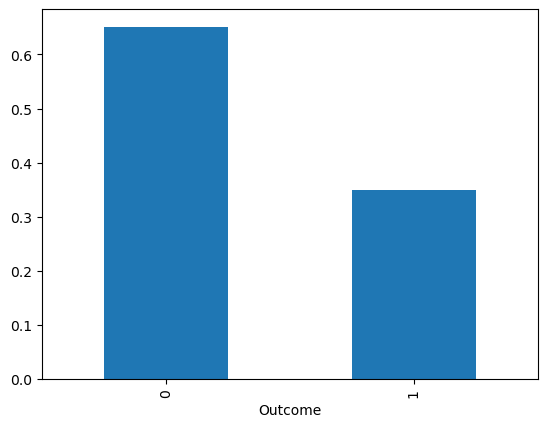

In [17]:
df.Outcome.value_counts(normalize = True).plot(kind ='bar')

In [18]:
#Output variable analysis.
df.Outcome.value_counts(normalize = True)

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

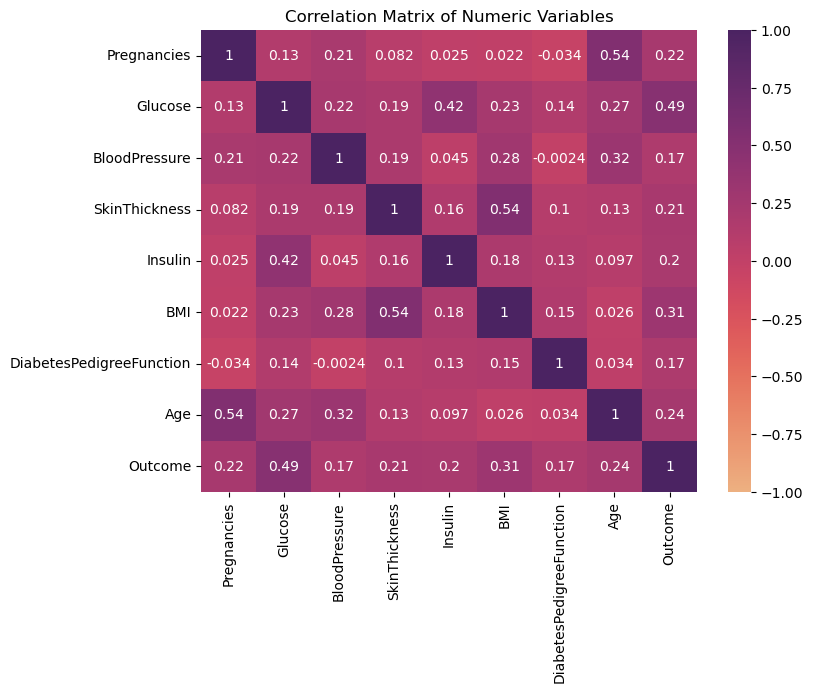

In [19]:
# Calculate correlation matrix
corr_matrix = df.corr()
# Plotting heatmap with 'flare' colormap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='flare', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

/Users/shivasmackbookair/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x600 with 0 Axes>

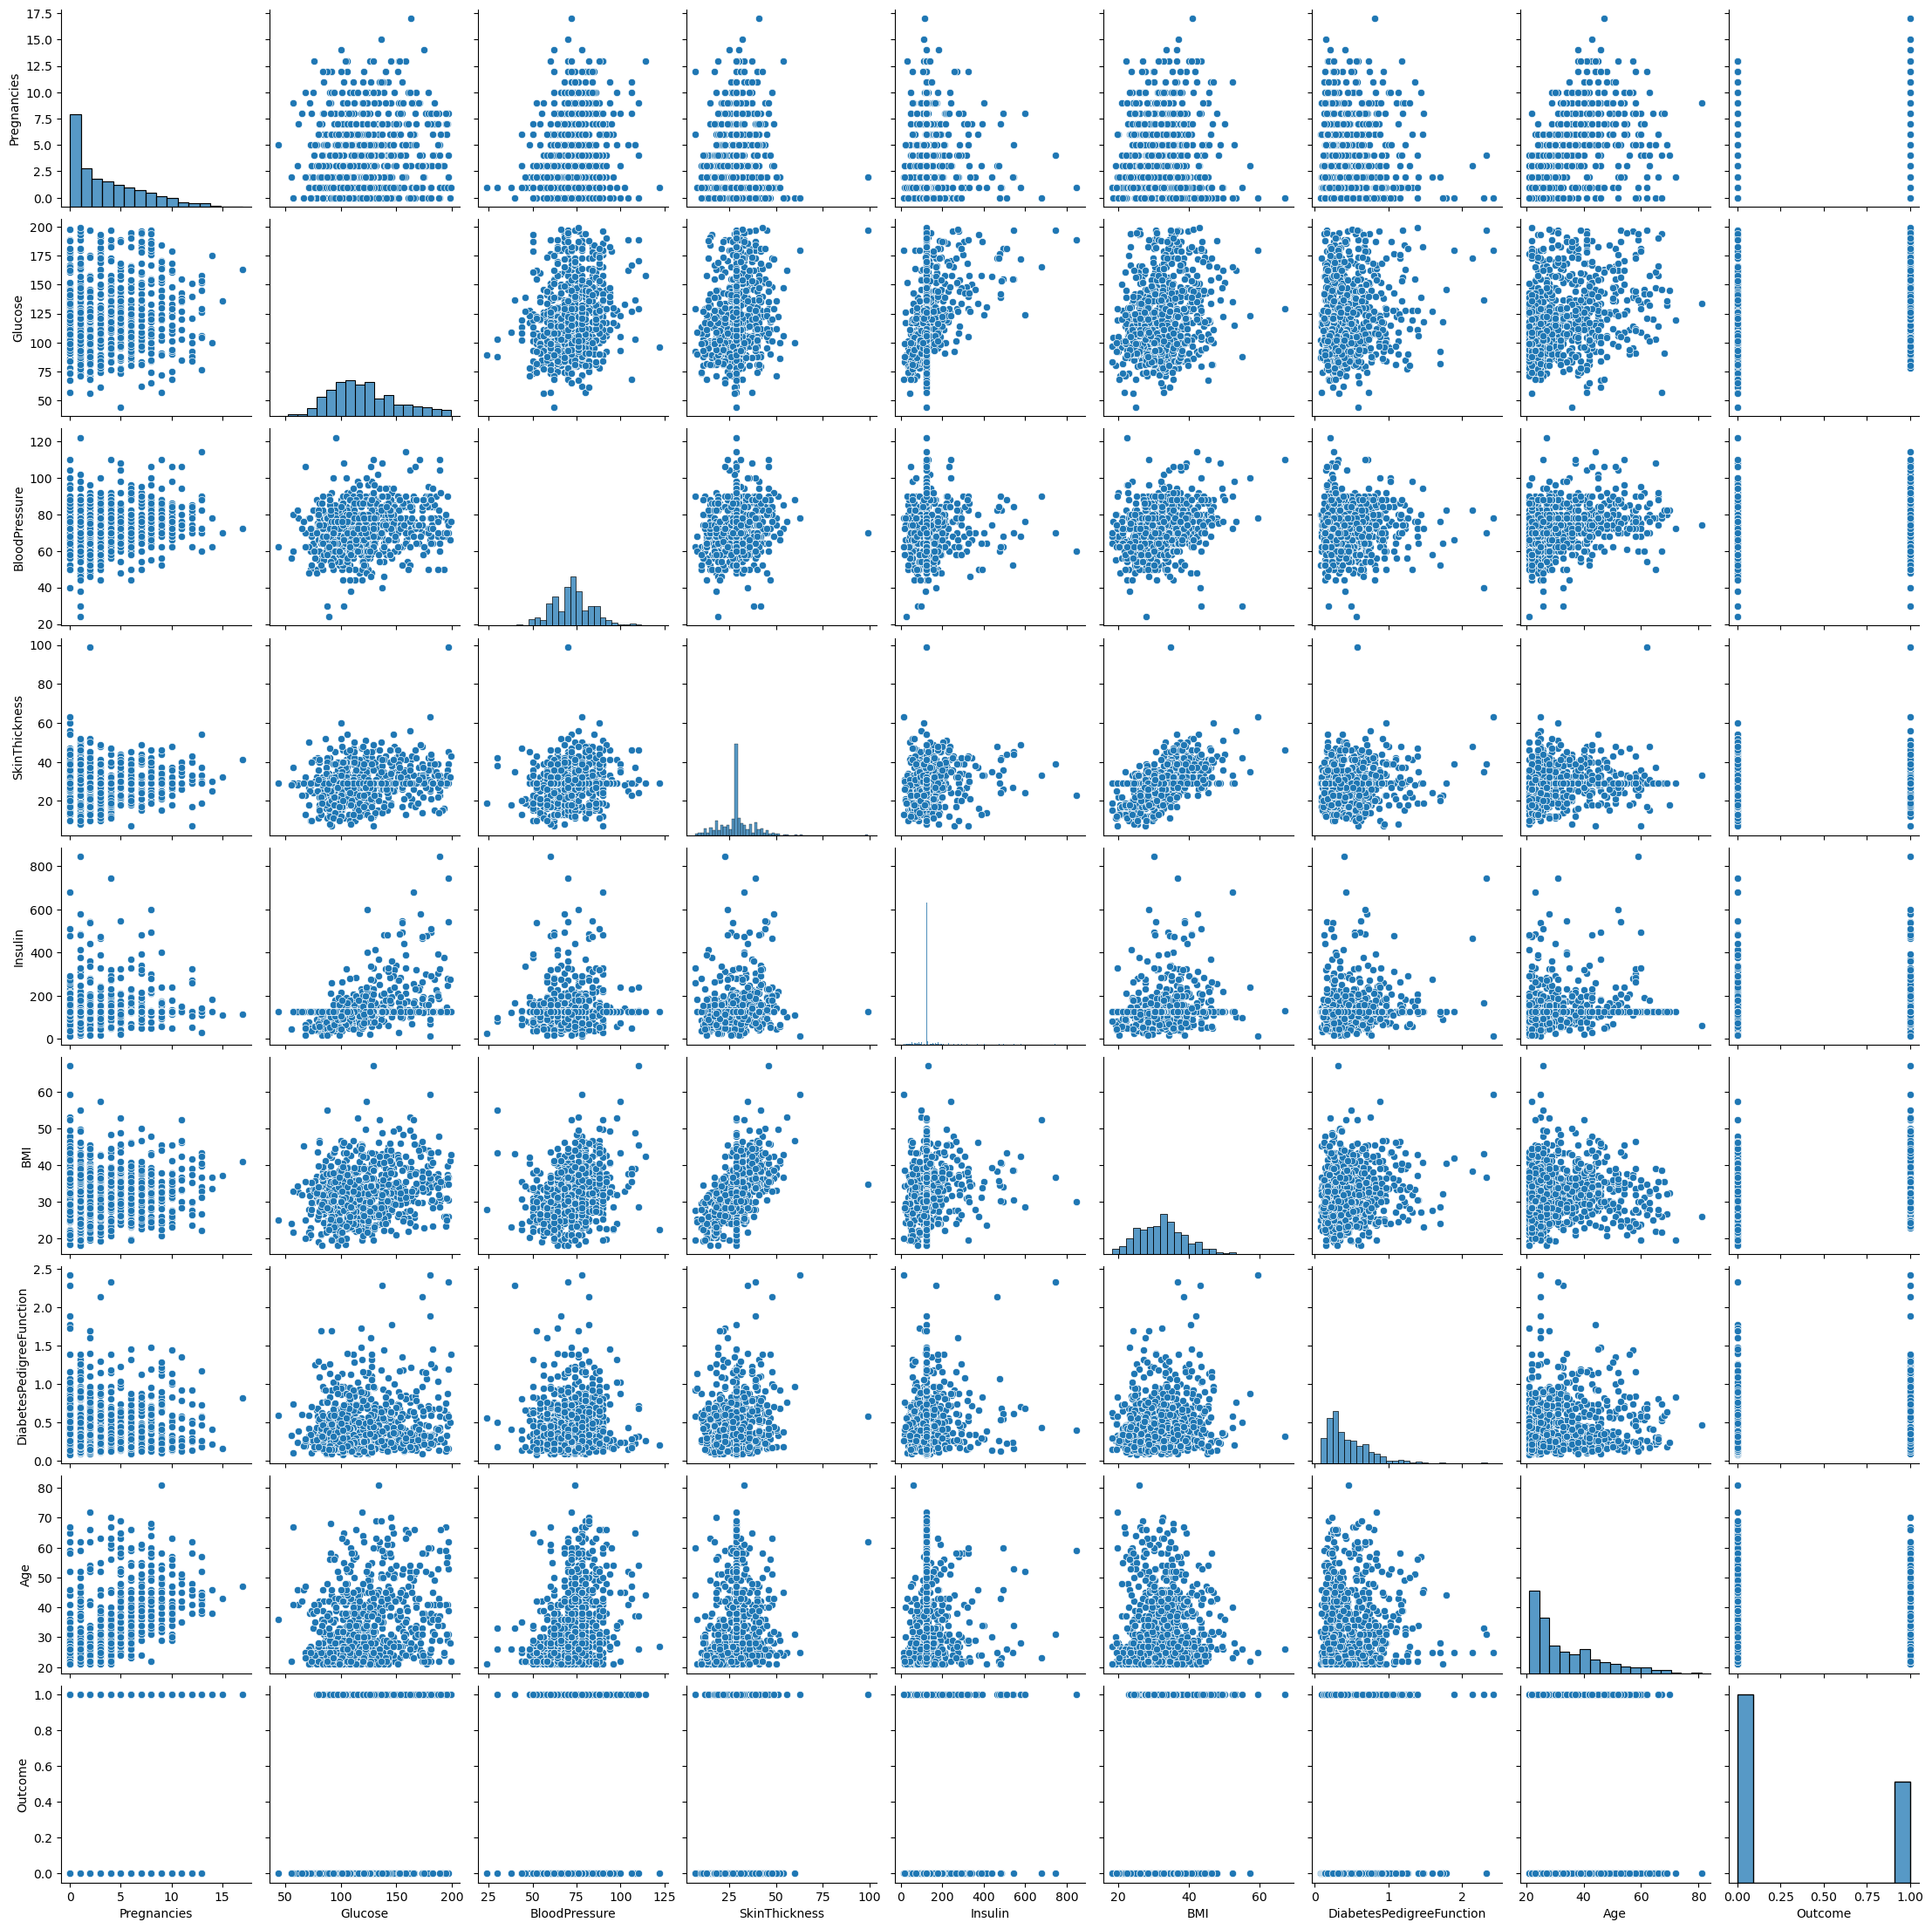

In [20]:
# Create pair scatter plot using seaborn
plt.figure(figsize=(12, 6))
sns.pairplot(df)
plt.show()

In [21]:
# Creating input and output datasets.
x = df.drop('Outcome',axis= 1)
y = df['Outcome']


In [22]:
#Scaling the dataset
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler()
transform_x = scaler.fit_transform(x)
transform_x

array([[0.35294118, 0.67096774, 0.48979592, ..., 0.31492843, 0.23441503,
        0.48333333],
       [0.05882353, 0.26451613, 0.42857143, ..., 0.17177914, 0.11656704,
        0.16666667],
       [0.47058824, 0.89677419, 0.40816327, ..., 0.10429448, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.49677419, 0.48979592, ..., 0.16359918, 0.07130658,
        0.15      ],
       [0.05882353, 0.52903226, 0.36734694, ..., 0.24335378, 0.11571307,
        0.43333333],
       [0.05882353, 0.31612903, 0.46938776, ..., 0.24948875, 0.10119556,
        0.03333333]])

In [23]:
#splitting the data for training & testing
from sklearn.model_selection import train_test_split


In [24]:
x_train,x_test,y_train,y_test = train_test_split(transform_x,y,test_size=.25, random_state=42,stratify=y)

### DecisionTreeClassifier

In [25]:
#Imported DecisionTreeClassifier from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [26]:
# Train a decision tree model with max depth of 7
clf = DecisionTreeClassifier(max_depth=7, random_state=42)
clf.fit(x_train, y_train)

clf.score(x_train,y_train)
clf.score(x_test,y_test)
y_pred = clf.predict(x_test)


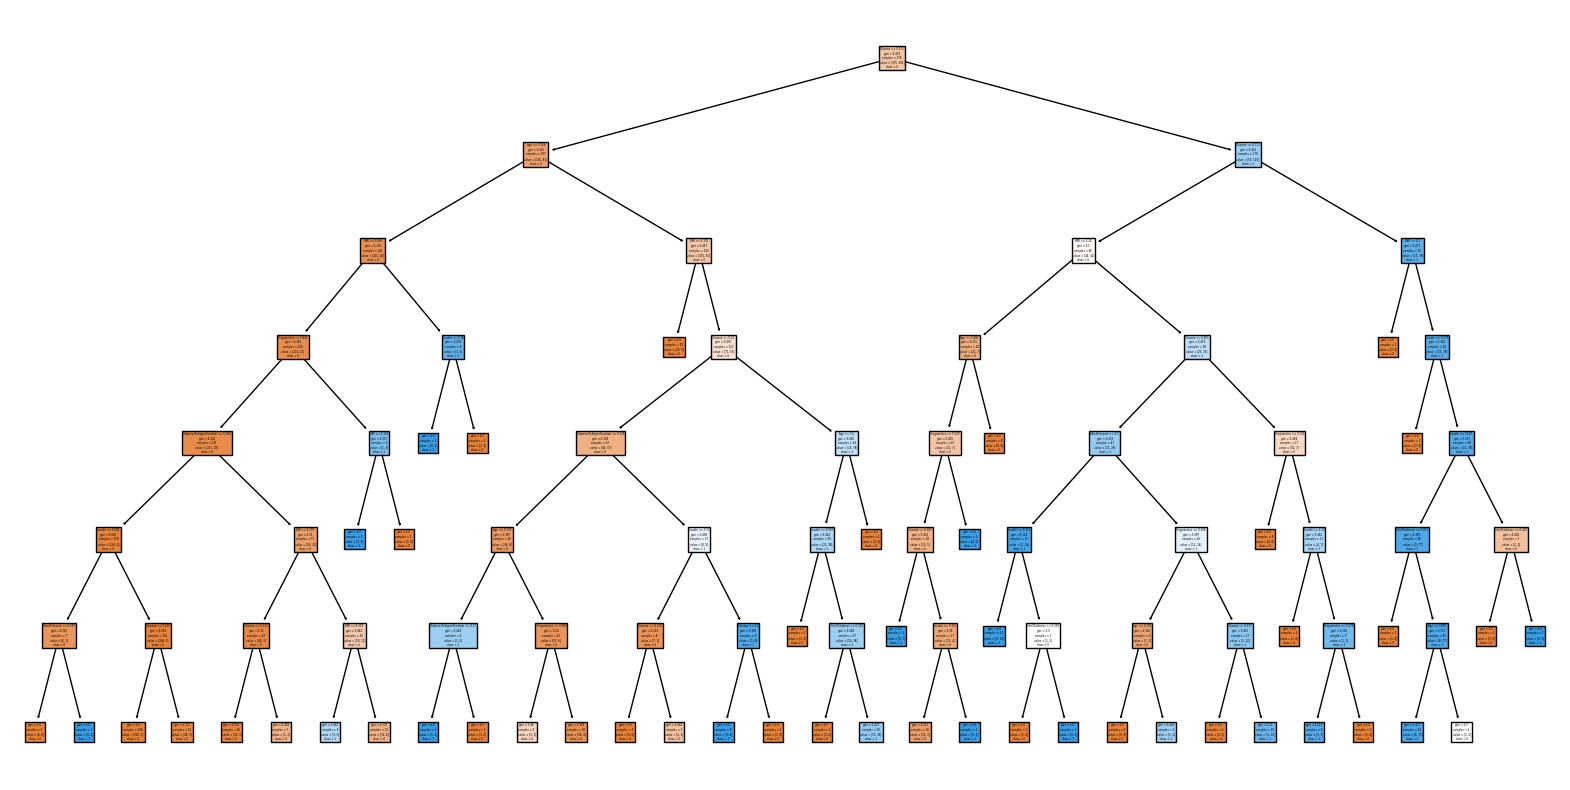

In [27]:
# Convert feature names to a list
feature_names = x.columns.tolist()
class_names = clf.classes_.astype(str).tolist()

# Visualize the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=feature_names, class_names=class_names, filled=True)
plt.show()

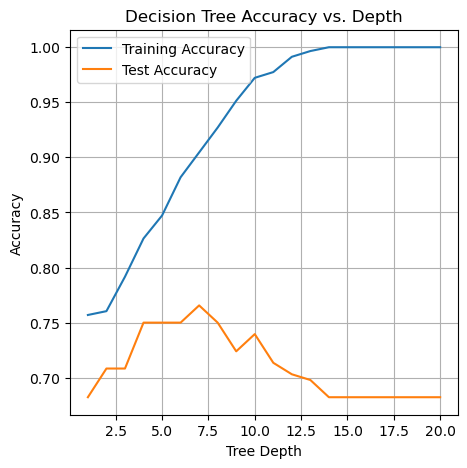

In [28]:
# List to store accuracies
train_accuracies = []
test_accuracies = []
depths = range(1, 21) 

for depth in depths:
    # Train a decision tree model with specified max depth
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(x_train, y_train)
    
    # Predict on training and test sets
    y_train_pred = clf.predict(x_train)
    y_test_pred = clf.predict(x_test)
    
    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot accuracies
plt.figure(figsize=(5, 5))
plt.plot(depths, train_accuracies, label='Training Accuracy')
plt.plot(depths, test_accuracies, label='Test Accuracy')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs. Depth')
plt.legend()
plt.grid(True)
plt.show()


In [29]:
#Used classification report for evaluation of model performance
from sklearn.metrics import classification_report as cr
print(cr(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       125
           1       0.68      0.63      0.65        67

    accuracy                           0.77       192
   macro avg       0.74      0.73      0.74       192
weighted avg       0.76      0.77      0.76       192



In [30]:
#confusion matrix
from sklearn.metrics import confusion_matrix as cm
print(cm(y_test,y_pred))

[[105  20]
 [ 25  42]]


### RandomForest ML Model implementation

In [31]:
# RandomForestClassifier model 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=16, random_state=42)
# fit the model on traing data
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
rf.score(x_test,y_test)
#prediction on test data
y_pred = rf.predict(x_test)

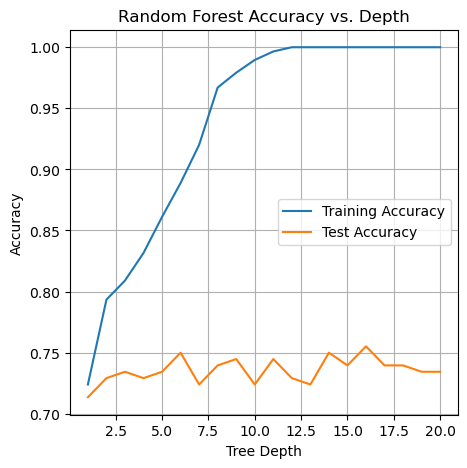

In [32]:
# Lists to store accuracies
train_accuracies = []
test_accuracies = []
depths = range(1, 21)  # Vary depth from 1 to 20

for depth in depths:
    # Train a Random Forest model with specified max depth
    rf = RandomForestClassifier(max_depth=depth, n_estimators=100, random_state=42)
    rf.fit(x_train, y_train)
    
    # Predict on training and test sets
    y_train_pred = rf.predict(x_train)
    y_test_pred = rf.predict(x_test)
    
    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot accuracies
plt.figure(figsize=(5, 5))
plt.plot(depths, train_accuracies, label='Training Accuracy')
plt.plot(depths, test_accuracies, label='Test Accuracy')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy vs. Depth')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
#classification report to evaluate the model
from sklearn.metrics import classification_report as cr
print(cr(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       125
           1       0.68      0.57      0.62        67

    accuracy                           0.76       192
   macro avg       0.73      0.71      0.72       192
weighted avg       0.75      0.76      0.75       192



In [34]:
#confusion matrix
from sklearn.metrics import confusion_matrix as cm
print(cm(y_test,y_pred))

[[107  18]
 [ 29  38]]


Feature ranking:
1. feature 1 (0.26960993819921225)
2. feature 5 (0.1623036002828989)
3. feature 6 (0.12202601403523121)
4. feature 7 (0.12051224511482496)
5. feature 4 (0.08832781541174191)
6. feature 0 (0.08520773833900588)
7. feature 2 (0.08201361738504355)
8. feature 3 (0.0699990312320413)


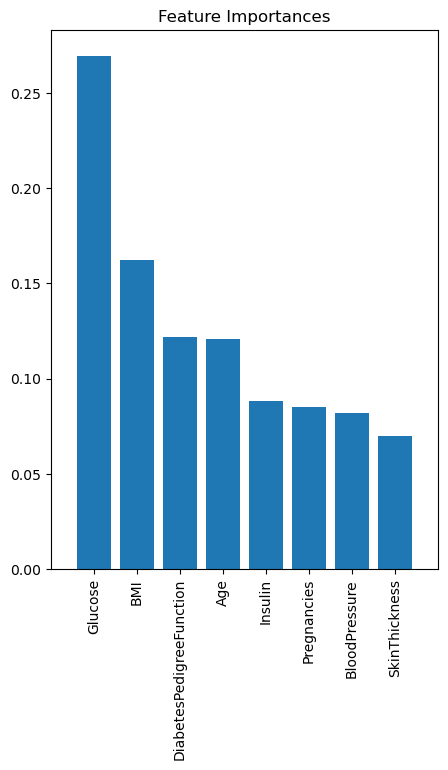

In [35]:
# Get feature importances
importances = rf.feature_importances_
feature_names = x.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for i in range(x.shape[1]):
    print(f"{i + 1}. feature {indices[i]} ({importances[indices[i]]})")

# Plot the feature importances
plt.figure(figsize=(5, 7))
plt.title("Feature Importances")
plt.bar(range(x.shape[1]), importances[indices], align='center')
plt.xticks(range(x.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, x.shape[1]])
plt.show()